<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Visualisierungen in Python 3: Visualisierungstypen</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

## Boxplot

Wir kommen nun zu einem sehr essentiellen Tool um die Verteilung von Daten in einem Dataset darzustellen. Dazu werden wir auch statistische Größen verwenden.

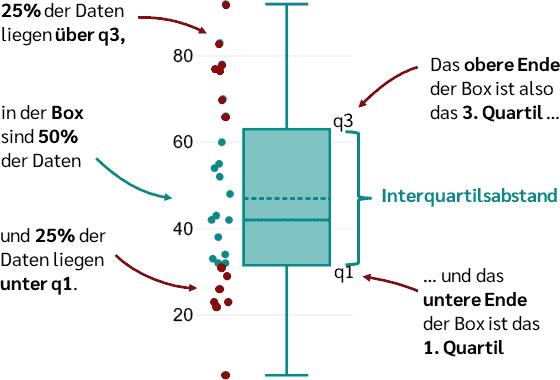

(von https://datatab.de/tutorial/boxplot)

**Achtung:** Auch wenn es hier so aussieht, muss natürlich der Mittelwert (strichlierte Linie) nicht in der Mitte der "Box" liegen.

Kurze Wiederholung:
* Wie ist der Median definiert?
* Wie sind die Quartile definiert?
* Was ist der Interquartilsabstand?
* Wie nennt man den Abstand von dem größten und dem kleinsten Wert?

**Eigenschaften eines Boxplots**:
* Visualisiert die Verteilung eines Datensatzes anhand von Quartilen
* Zeigt den Median, das untere und obere Quartil sowie mögliche Ausreißer
* Die „Box“ stellt die Interquartilspanne (IQR) dar, welche die mittleren 50 % der Daten umfasst
* Der Median wird als Linie innerhalb der Box dargestellt
* Gut geeignet, um Verteilungen und Unterschiede zwischen mehreren Gruppen zu vergleichen
* Nützlich zur Erkennung von Asymmetrien und Ausreißern in Daten
* Oft verwendet in explorativen Datenanalysen und statistischen Visualisierungen
* Zusätzliche Beschriftungen:
    * Titel
    * Achsenbeschriftungen (z.B. Kategorien und Wertebereiche)
    * Legende, falls mehrere Gruppen dargestellt werden
    * Mittelwert als strichlierte Linie

* Andere Variante: Unterer und oberer Strich (genannt Whiskers) repräsentieren die Werte $q_1-1.5\cdot \text{IQR}$ bzw. $q_3+1.5\cdot \text{IQR}$. Werte außerhalb sind *Ausreißer* und werden oft mit Punkten angegeben

Ähnlich wie bei den Balkendiagrammen ist es auch möglich, mehrere Boxplots nebeneinander darzustellenn.

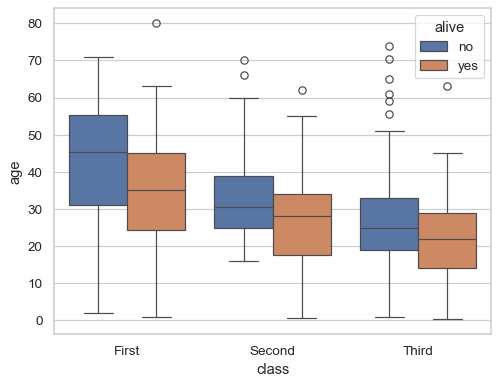

(von https://seaborn.pydata.org/_images/boxplot_5_0.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Daten laden (Titanic)

titanic = sns.load_dataset('titanic') # ggf. etwas anders als unser bisheriges Dataset

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


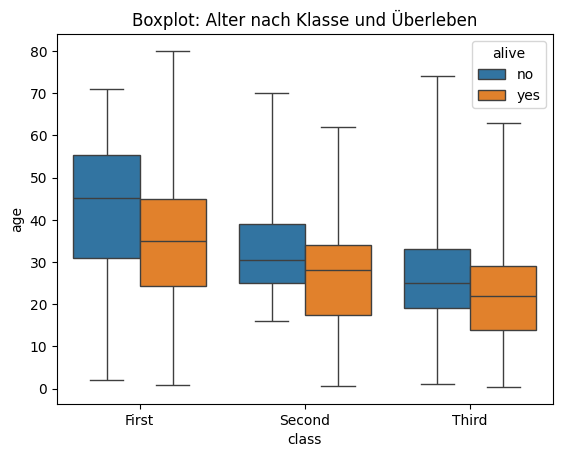

In [5]:
sns.boxplot(data=titanic, x="class", y="age", hue="alive", whis=(0,100)) # whis=(0,100) zeigt alle Datenpunkte an. Standard ist 1.5, welches alle Datenpunkte innerhalb von 1.5*IQR anzeigt
plt.title("Boxplot: Alter nach Klasse und Überleben")
plt.show()

andere Version:

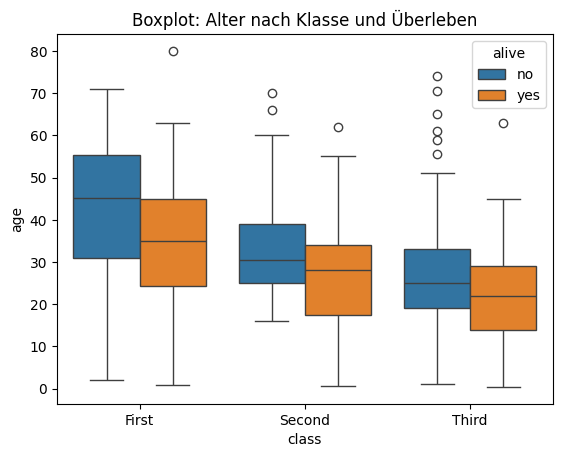

In [6]:
sns.boxplot(data=titanic, x="class", y="age", hue="alive")
plt.title("Boxplot: Alter nach Klasse und Überleben")
plt.show()

<Axes: xlabel='age', ylabel='class'>

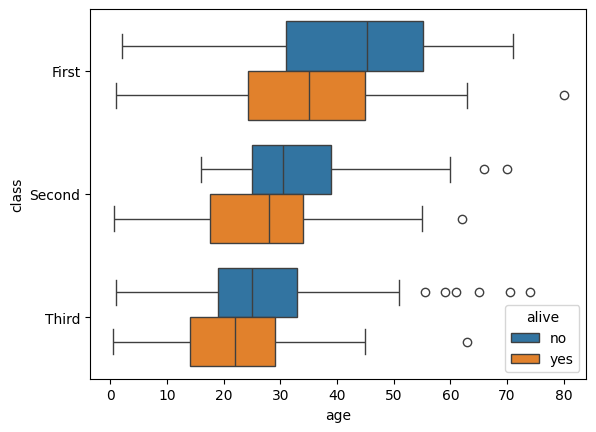

In [7]:
# Können auch horizontal gezeichnet werden
sns.boxplot(data=titanic, x="age", y="class", hue="alive", orient="h")

Das Boxplot erlaubt es, Unterschiede zwischen verschiedenen Gruppen zu zeichnen (und schnell zu erkennen).

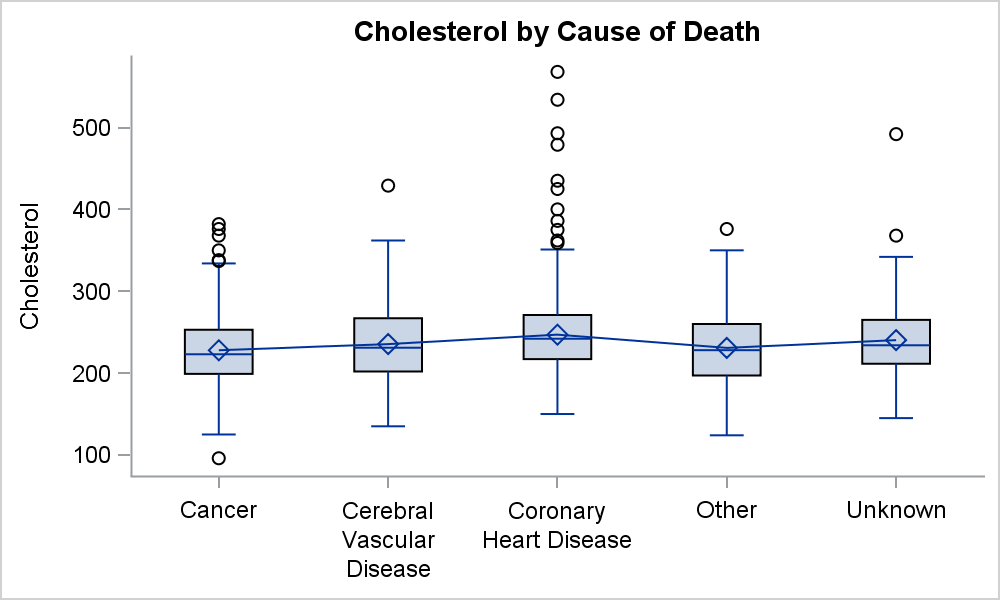

(from https://blogs.sas.com/content/graphicallyspeaking/2015/12/04/boxplot-with-connect/)

Was sagen uns die Boxplots für das Titanic Dataset?

---

## Violinen Diagramm

Um die Verteilung der Daten noch detailierter zu visualisieren, bearbeiten wir nun das sogenannte Violinen Diagramm (Violin Plot).

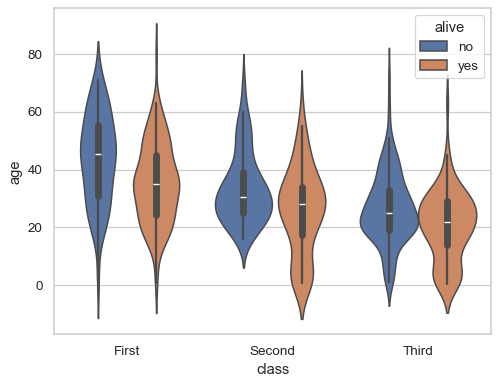

(von https://seaborn.pydata.org/generated/seaborn.violinplot.html)

**Eigenschaften eines Violin Plots**:
* Kombiniert Eigenschaften eines Boxplots und eines Dichteplots, um die Verteilung eines Datensatzes darzustellen
* Zeigt die Verteilung der Daten über die gesamte Wertebereich, visualisiert durch eine symmetrische Dichtekurve
* Die Form der "Violine" repräsentiert die Dichte der Daten bei verschiedenen Werten – breite Bereiche zeigen, wo viele Datenpunkte liegen
* Wie beim Boxplot zeigt der Violin Plot auch den Median und die Quartile
* Gut geeignet, um sowohl die Verteilung als auch Unterschiede zwischen mehreren Gruppen zu vergleichen
* Anders als beim Boxplot bietet der Violin Plot mehr Informationen über die zugrunde liegende Dichte der Daten
* Kann verwendet werden, um bimodale oder komplexe Verteilungen besser zu erkennen, die im Boxplot schwer erkennbar sind
* Zusätzliche Beschriftungen:
    * Titel
    * Achsenbeschriftungen (z.B. Kategorien und Wertebereiche)
    * Legende, wenn mehrere Gruppen dargestellt werden
* Nützlich zur Erkennung von Details in der Verteilung, die in einem Boxplot möglicherweise nicht sichtbar sind
* Kann bei kleineren Datensätzen weniger aussagekräftig sein (wie Boxplot)

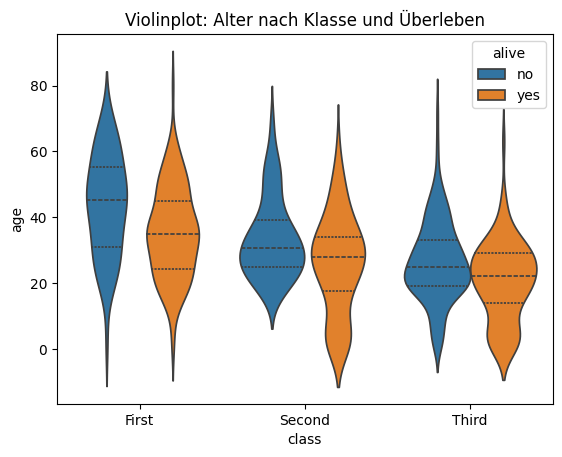

In [8]:
# Auch hier ist die Python implementierung mit Seaborn sehr einfach

sns.violinplot(data=titanic, x="class", y="age", hue="alive", inner='quart') # inner legt fest, ob die Box gezeichnet wird (default='box') andere optionen: quart, stick, box
plt.title("Violinplot: Alter nach Klasse und Überleben")
plt.show()

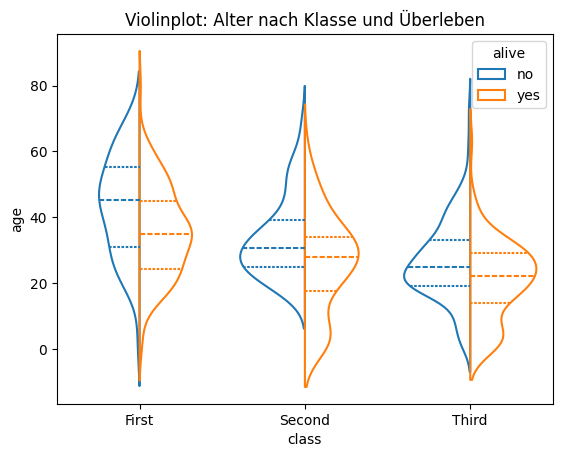

In [9]:
# Wir können aber auch splitten bzw. die Füllung weglassen
sns.violinplot(data=titanic, x="class", y="age", hue="alive", split=True, inner='quart', fill=None)
plt.title("Violinplot: Alter nach Klasse und Überleben")
plt.show()

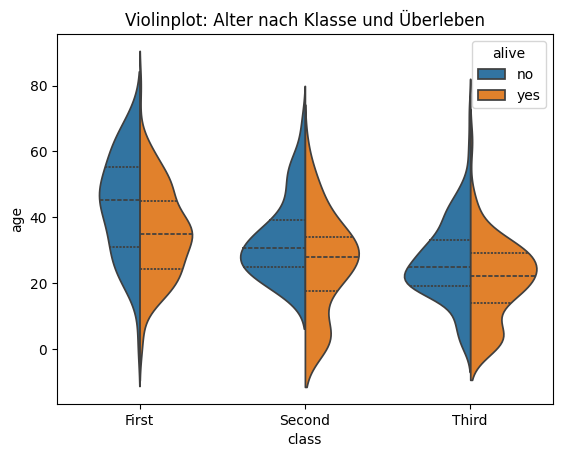

In [10]:
# Wir können aber auch splitten bzw. die Füllung weglassen
sns.violinplot(data=titanic, x="class", y="age", hue="alive", split=True, inner='quart')
plt.title("Violinplot: Alter nach Klasse und Überleben")
plt.show()

---

## Scatter Plot

Ein etwas anderes Konzept bietet das so genannte Streudiagramm (engl. Scatter Plot). Es stellt die Datenpunkte dar, indem sie an ihre räumliche Position im Diagramm platziert werden.

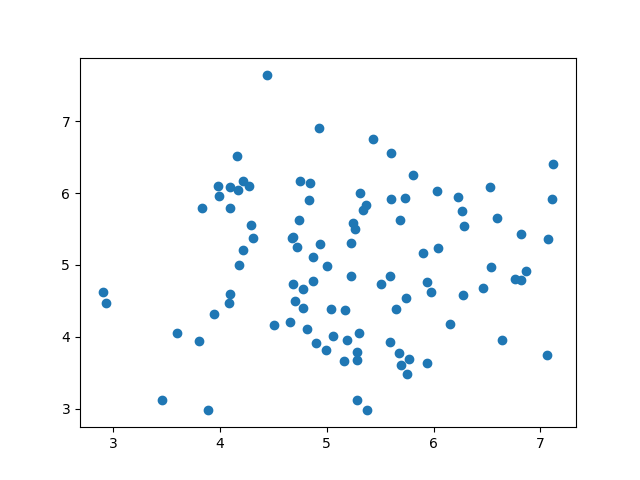

(von https://www.w3schools.com/python/python_ml_scatterplot.asp)

**Eigenschaften eines Scatter Plots**:
* Visualisiert die Beziehung zwischen zwei numerischen Variablen als Punkte in einem kartesischen Koordinatensystem
* Jeder Datenpunkt ist ein Punkt im $\mathbb{R}^d, d\in \mathbb{N}$ und zeigt die Werte beider Variablen für eine bestimmte Beobachtung (theoretisch macht nur $d\leq 3$ Sinn, praktisch nur $d= 2$) Warum?
* Gut geeignet um Muster, Trends oder Korrelationen zwischen Variablen zu erkennen
* Kann verwendet werden, um positive, negative oder keine Korrelation darzustellen
* Bei größeren Datenmengen können Overlaps entstehen, wodurch dichte Bereiche schwer erkennbar werden (Overplotting)
* Zusätzliche Informationen können durch Farb- oder Größenkodierung der Punkte eingefügt werden, um eine dritte Variable darzustellen
* Ideal, um Ausreißer oder Cluster zu identifizieren
* Zusätzliche Beschriftungen:
    * Titel
    * Achsenbeschriftungen (für die x- und y-Achse, die jeweilige Variablen darstellen)
    * Legende, falls weitere Dimensionen durch Farben oder Größen der Punkte kodiert sind
    * Punkte direkt (wenn sehr wenig)
* Eine Funktion (zum Beispiel eine Trendlinie) kann hinzugefügt werden, um den Trend zwischen den Variablen besser sichtbar zu machen
* Sehr nützliches und oft verwendetes Tool für explorative Datenanalysen, um Zusammenhänge zwischen verschiedenen Variablen zu verstehen

Nun plotten wir verschiedene Scatter Plots

In [11]:
# Daten laden

tips = sns.load_dataset('tips')

In [12]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='total_bill', ylabel='tip'>

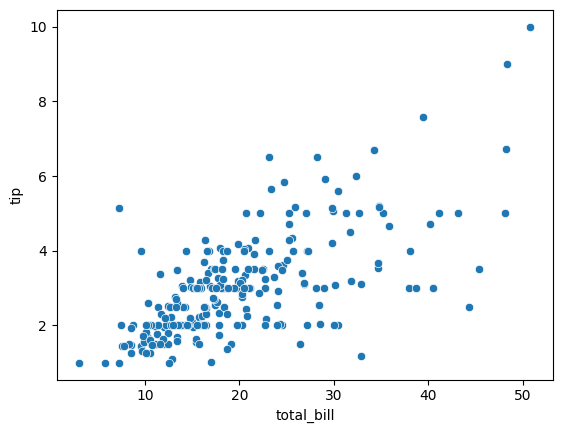

In [14]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

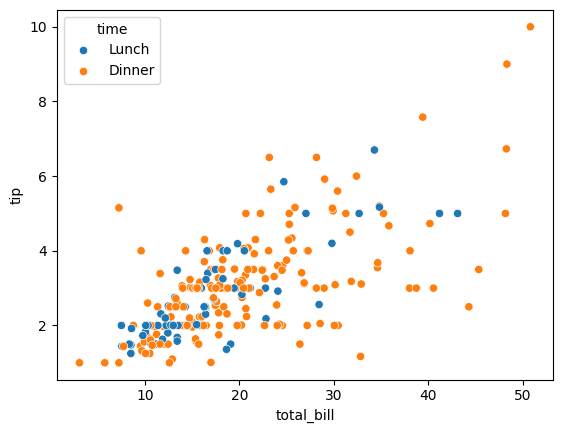

In [15]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

<Axes: xlabel='total_bill', ylabel='tip'>

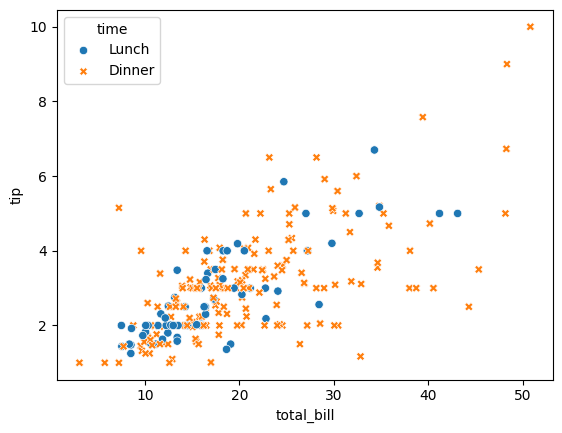

In [16]:
# Wir können auch Styles hinzufügen
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time")

<Axes: xlabel='total_bill', ylabel='tip'>

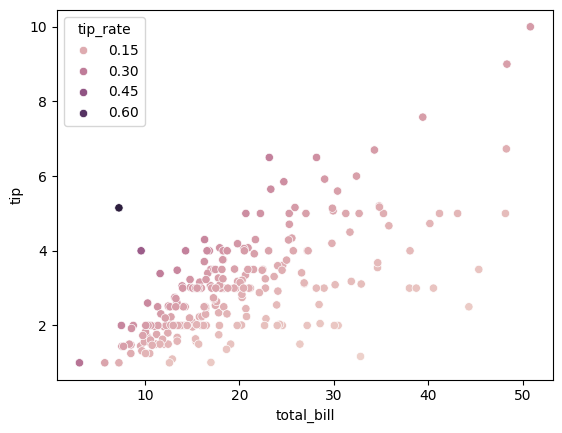

In [17]:
tip_rate = tips.eval("tip / total_bill").rename("tip_rate")
sns.scatterplot(data=tips, x="total_bill", y="tip", hue=tip_rate)

<Axes: xlabel='total_bill', ylabel='tip'>

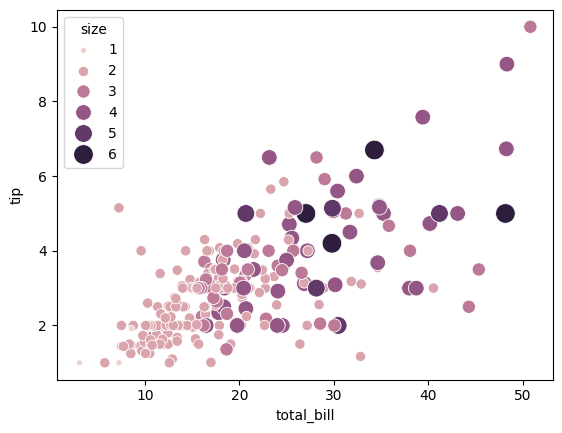

In [18]:
# Eine weitere Möglichkeit ist es, die size zu verwenden

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size="size", sizes=(20, 200), legend="full") # Dabei kann sizes = (20, 200) weggelassen werden

Natürlich können auch Daten in $\mathbb{R}^3$ in einem Scatter Plot dargestellt werden, ist aber normalerweise sehr unübersichltich.

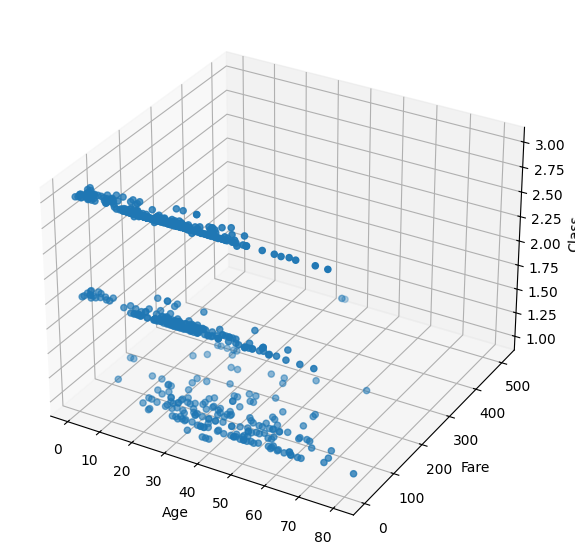

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
sc = ax.scatter(titanic['age'], titanic['fare'], titanic['pclass'])

# Add labels
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Class')

# Show plot
plt.show()

Besser ist hier ein 2D Scatter Plot mit der Klasse als Farbe encodiert.

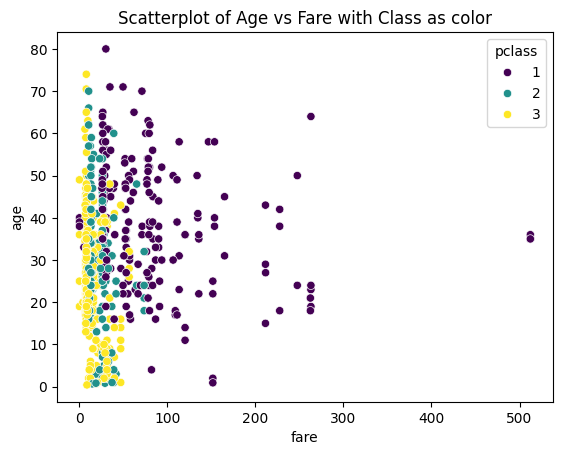

In [20]:
# 2D Scatterplot with Class being the color
sns.scatterplot(data=titanic, x='fare', y='age', hue='pclass', palette='viridis')
plt.title('Scatterplot of Age vs Fare with Class as color')
plt.show()

---

## Histogramm

Wie im Notebook "visualisierung_2.ipynb" bereits geschrieben, könnten theoretisch solche Plots auftauchen, wenn wir immer Bar-Charts verwenden würden.

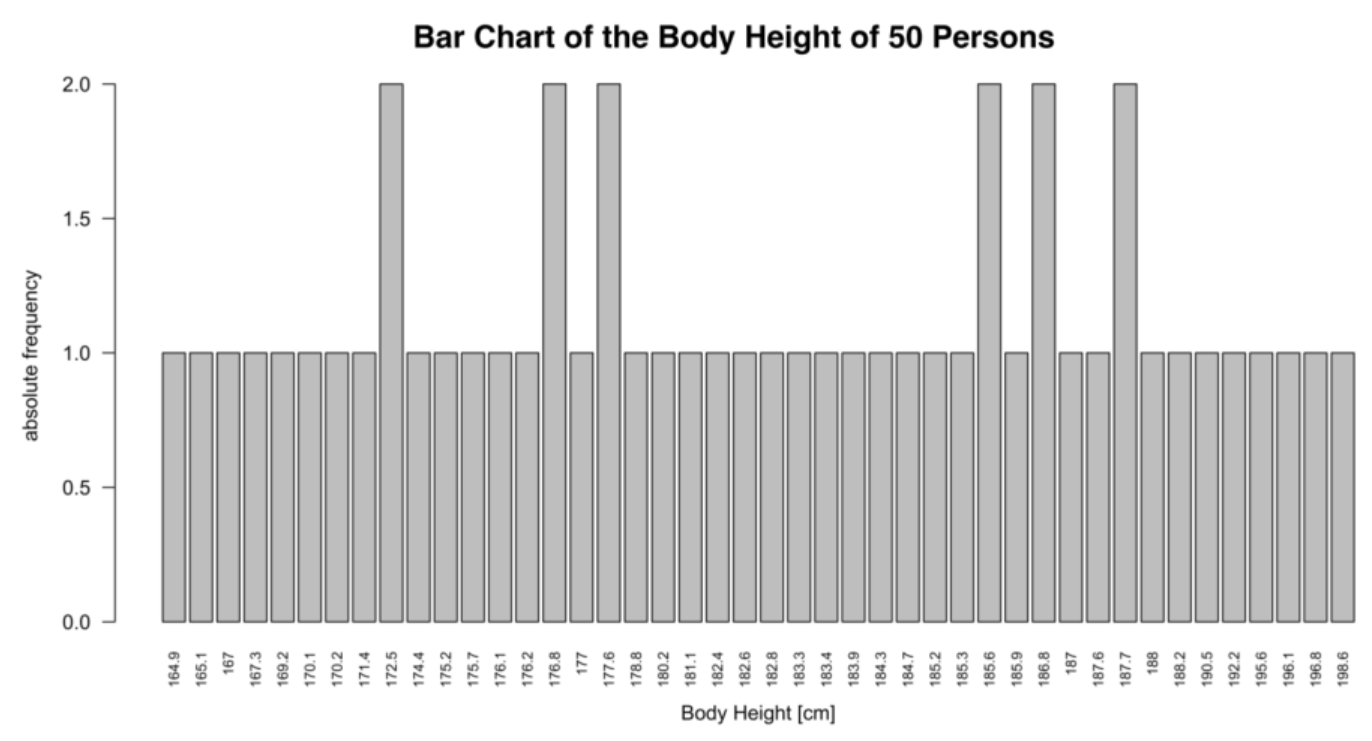

(from Forstner SS2022; JKU)

Deswegen werden wir uns nun das Histogramm ansehen.

Um die Verteilung eines einzelnen Features in einem Dataset darzustellen, kommt oft ein Histogramm sehr gelegen.

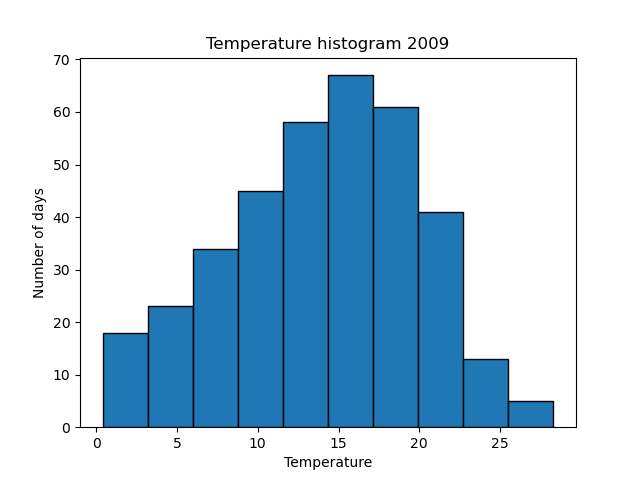

(von https://www.pythoninformer.com/python-libraries/matplotlib/histograms/)

**Eigenschaften eines Histogramms**:
* Visualisiert die Verteilung einer einzelnen numerischen Variable durch die Gruppierung der Daten in Intervalle (**Bins**)
* Wie groß muss man die Bins wählen?
* Die Höhe der Balken repräsentiert die Häufigkeit der Datenpunkte innerhalb eines Intervalls
* Gut geeignet, um die Form der Verteilung, Schiefe und Streuung einer Variable zu erkennen
* Zeigt Bereiche hoher oder niedriger Datenkonzentration sowie Ausreißer (je nach Bingröße)
* Die Breite der Bins beeinflusst die Genauigkeit der Darstellung – zu breite Bins können Details verdecken, zu schmale Bins können die Daten verrauschen
* Oft in Verbindung mit relativen Häufigkeiten oder Wahrscheinlichkeiten dargestellt, um die prozentuale Verteilung zu veranschaulichen
* Zusätzliche Beschriftungen:
    * Titel
    * Achsenbeschriftungen (x-Achse für die Intervallbereiche, y-Achse für die Häufigkeiten)
    * Legende, falls mehrere Datensätze oder Kategorien in einem Histogramm verglichen werden
* Kann leicht mit anderen Diagrammen wie *Dichteplots* kombiniert werden, um die Verteilung noch detaillierter darzustellen
* Besonders nützlich für explorative Datenanalysen, um schnell einen Überblick über die Verteilung der Daten zu erhalten

In [21]:
penguins = sns.load_dataset("penguins")

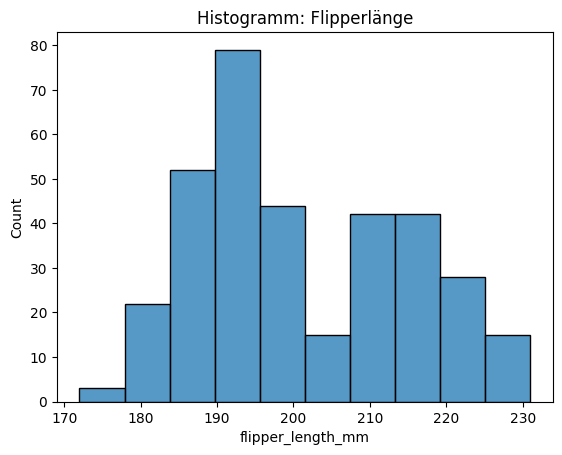

In [22]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=10)
plt.title("Histogramm: Flipperlänge")
plt.show()

Seaborn bietet uns hier wieder einige Möglichkeiten, die Histogramme zu modifizieren.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

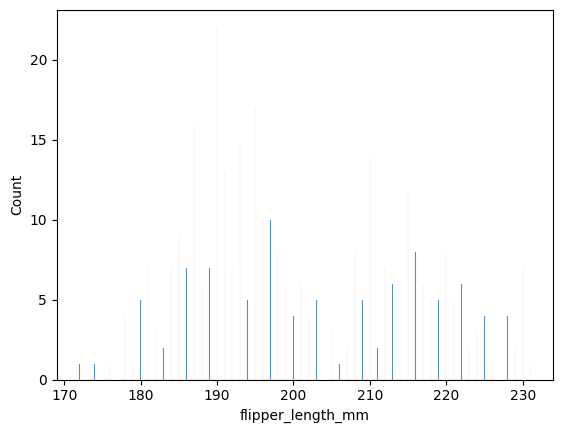

In [23]:
# Andere Bin-Größen
sns.histplot(data=penguins, x="flipper_length_mm", bins=1000)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

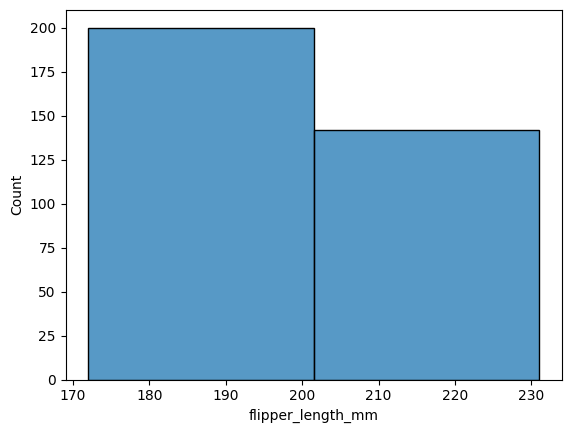

In [24]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=2)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

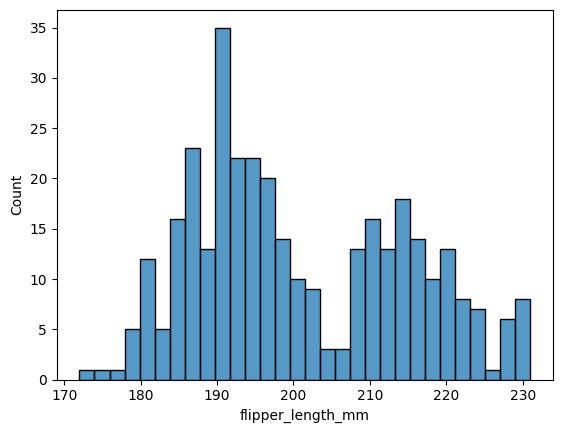

In [25]:
# Aber auch Bin-Width kann eingestellt werden
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=2)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

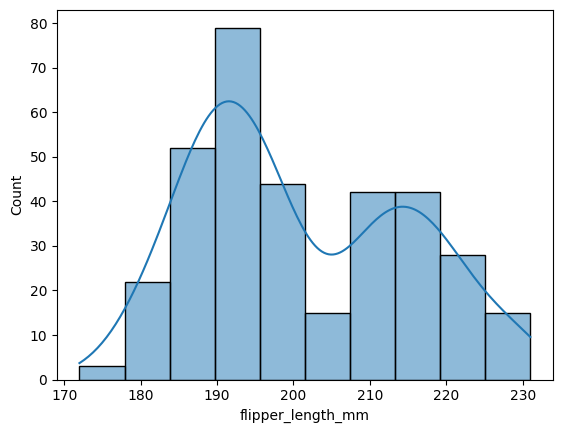

In [26]:
# Es kann auch ein Kernel Density Plot gezeichnet werden
sns.histplot(data=penguins, x="flipper_length_mm", kde=True) # default ist kde=False

# Hier steht das kde für Kernel Density Estimation (Dichteschätzung).

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

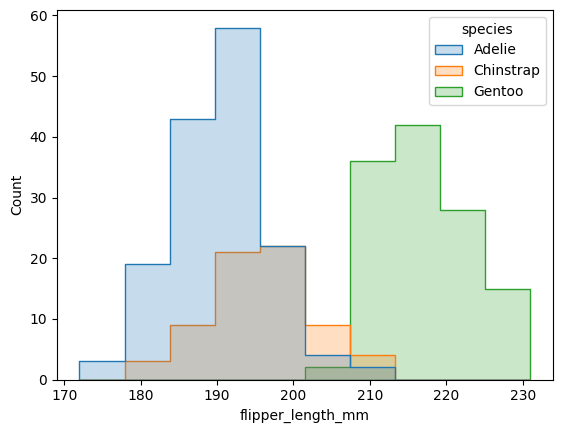

In [27]:
# Es kann auch eine weitere Information encoded werden mit Hilfe einer Farbe
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", element="step")

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

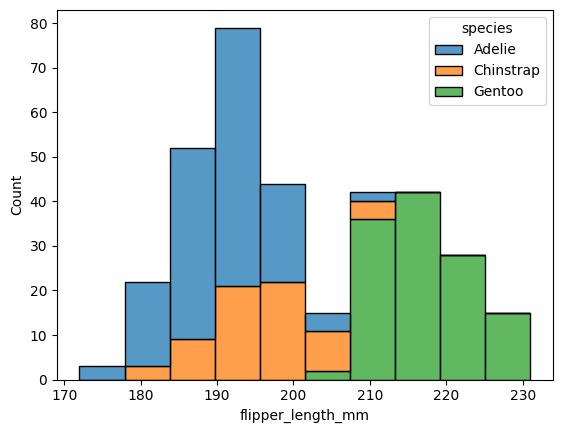

In [28]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

---

## Dichte Plot

Wie bereits in den Histogrammen verwendet wollen wir nun auch die Dichteplots besprechen. Sie *schätzen* die Dichteverteilung der gegeben Daten.

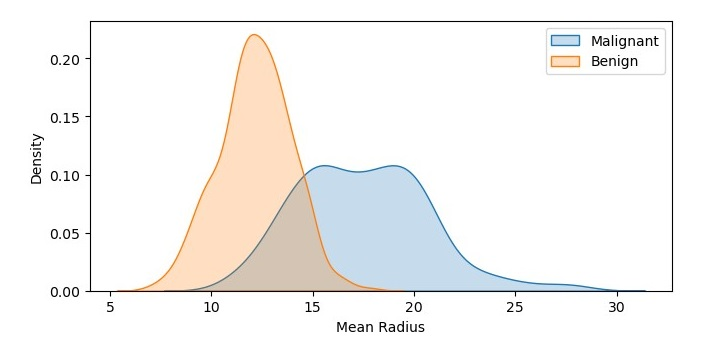

(von https://www.tutorialspoint.com/machine_learning/machine_learning_density_plots.htm)

**Eigenschaften eines Dichteplots**:
* Visualisiert die Verteilung einer numerischen Variable durch eine geglättete Kurve, die die Wahrscheinlichkeitsdichte darstellt
* Zeigt die relative Häufigkeit von Werten ähnlich wie ein Histogramm, jedoch ohne die Daten in feste Intervalle (Bins) zu unterteilen
* Gut geeignet, um die Form der Verteilung sanfter darzustellen, wodurch Muster wie Peaks oder Täler deutlicher erkennbar werden
* Die Fläche unter der Kurve entspricht der Gesamtwahrscheinlichkeit von 1 (bei Wahrscheinlichkeitsdichte)
* Glättung der Kurve wird durch einen sogenannten „Kernel“ bestimmt, dessen Breite (Bandbreite) die Glätte beeinflusst – größere Bandbreiten führen zu glatteren, aber weniger detaillierten Kurven
* Nützlich, um multimodale Verteilungen oder subtile Variationen zu identifizieren, die in einem Histogramm schwerer zu erkennen wären
* Kann auch verwendet werden, um mehrere Datensätze oder Gruppen zu vergleichen, indem mehrere Dichtekurven übereinander gelegt werden
* Zusätzliche Beschriftungen:
    * Titel
    * Achsenbeschriftungen (x-Achse für die Werte der Variablen, y-Achse für die Dichte)
    * Legende, falls mehrere Gruppen oder Verteilungen dargestellt werden
* Besonders nützlich, um bei größeren Datensätzen kontinuierliche Verteilungen präzise darzustellen
* Kann mit anderen Diagrammen wie Boxplots (ergibt Violin Plot) oder Histogrammen (siehe vorher) kombiniert werden, um eine detailliertere Analyse der Verteilung zu ermöglichen
* **Wichtig**: Ist nur eine Schätzung. Somit kann es irreführend sein. Was könnte theoretisch falsch laufen?

In [29]:
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

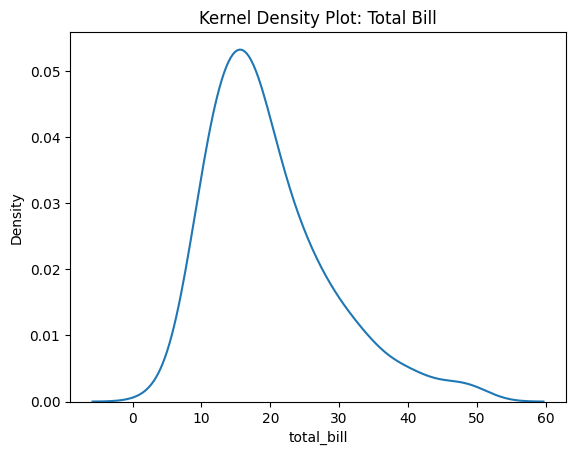

In [30]:
sns.kdeplot(data=tips, x="total_bill")
plt.title("Kernel Density Plot: Total Bill")
plt.show()

<Axes: xlabel='Density', ylabel='total_bill'>

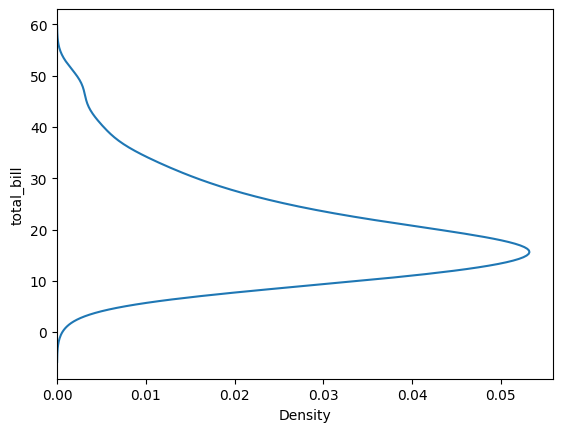

In [31]:
# kann auch gedreht werden
sns.kdeplot(data=tips, y="total_bill")

<Axes: ylabel='Density'>

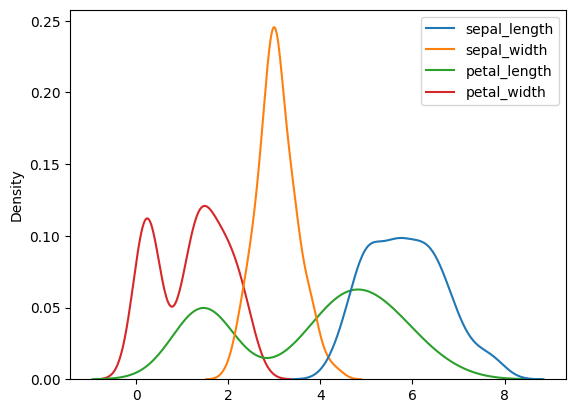

In [32]:
sns.kdeplot(data=iris) # Verteilung der einzelnen Features im Iris dataset. Label ist hier nicht notwendig.

<Axes: xlabel='total_bill', ylabel='Density'>

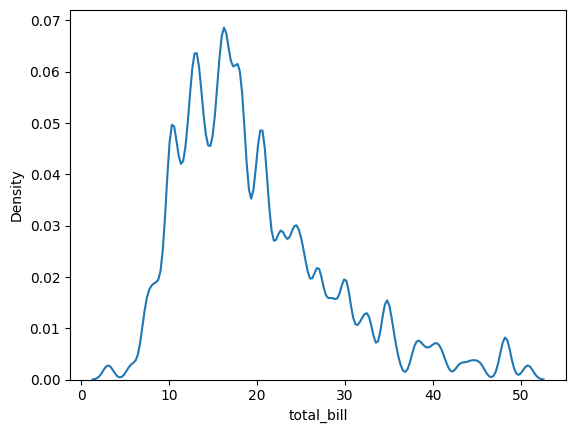

In [33]:
# We can change the kernel used for the density estimation (vergleiche mit vorher)
sns.kdeplot(data=tips, x='total_bill', bw_adjust=0.2)

<Axes: xlabel='total_bill', ylabel='Density'>

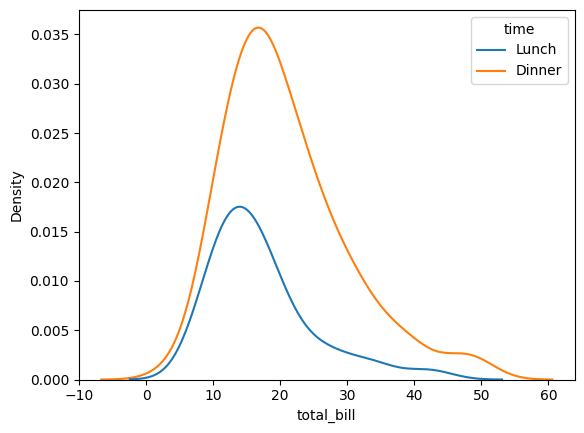

In [34]:
# erneut können auch Farben verwendet werden um eine weitere Kategorie zu inkludieren
sns.kdeplot(data=tips, x='total_bill', hue='time')

<Axes: xlabel='total_bill', ylabel='Density'>

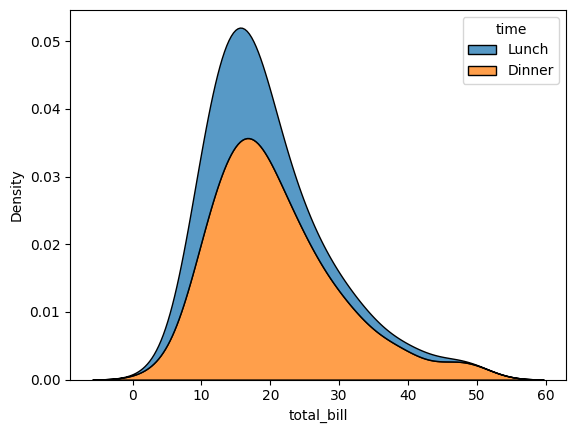

In [35]:
# auch die 'multiple' Option existiert wieder
sns.kdeplot(data=tips, x='total_bill', hue='time', multiple='stack') # auch multiple='fill' ist möglich, default ist multiple='layer'

Eine sehr prominente Dichtefunktion ist die Normalverteilung (Gauss'sche Glockenkurve). Wir haben diese bereits besprochen, können aber jetzt nochmal mit Histogrammen und Density Plots bzw. Scatter Plots die Verteilung unter die Lupe nehmen.

In [36]:
import numpy as np

In [37]:
data = np.random.normal(loc=0, scale=1, size=10000)

<Axes: ylabel='Count'>

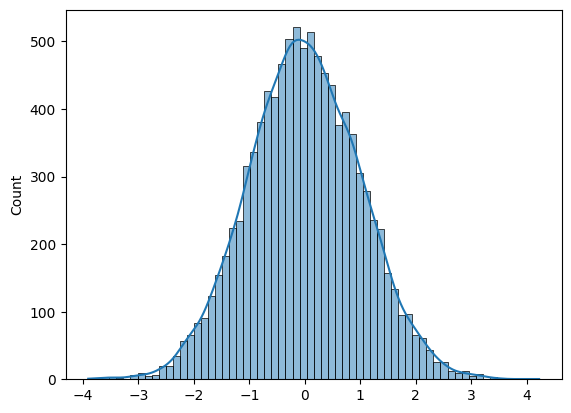

In [38]:
# Histogramm der Normalverteilung
sns.histplot(data=data, kde=True)

(-10.0, 30.0)

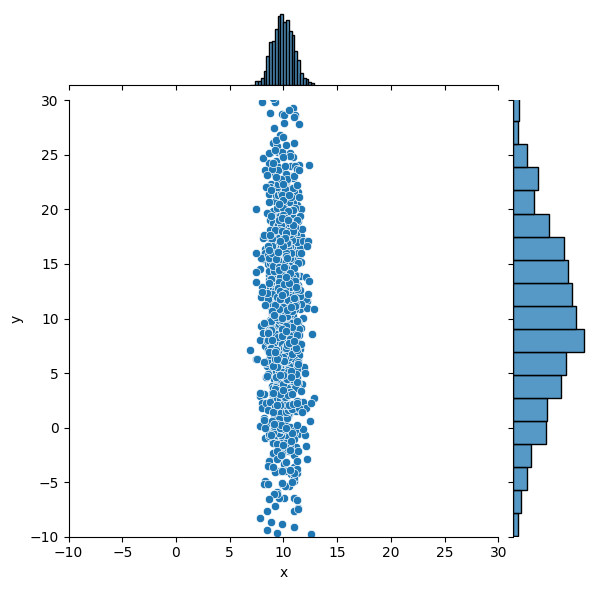

In [39]:
x = np.random.normal(10, 1, 1000)
y = np.random.normal(10, 8, 1000)

df = pd.DataFrame({'x': x, 'y': y})

sns.jointplot(data = df, x='x', y='y')
plt.xlim(-10,30)
plt.ylim(-10,30)

Ohne der Einschränkung der Achsen würde der Plot so aussehen:

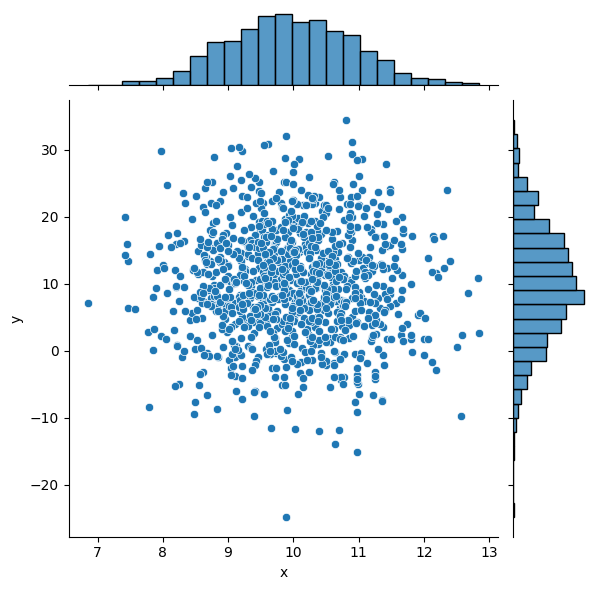

In [40]:
sns.jointplot(data = df, x='x', y='y')

---

## Pairplot

Nun kommen wir noch zum Pairplot. Dieses kombiniert normalerweise das bisher bekannte Streudiagramm (Scatter Plot) mit einem Density Plot. Hier können alle Features "gegeneinander" geplottet werden.

**Eigenschaften eines Pairplots**:
* Ist symmetrisch bezüglich der 2. Mediane
* Visualisiert die Beziehungen zwischen mehreren numerischen Variablen, indem alle möglichen Paarkombinationen der Variablen als Scatter Plots dargestellt werden
* Zeigt Scatter Plots in einer Matrixform, wobei jede Zelle der Matrix die Beziehung zwischen zwei Variablen darstellt (es sind aber auch andere Diagrammtypen möglich)
* Die Diagonale der Matrix enthält in der Regel Histogramme oder Dichteplots, um die Verteilung jeder einzelnen Variablen anzuzeigen
* Gut geeignet, um Korrelationen, Trends und Ausreißer zwischen mehreren Variablen gleichzeitig zu erkennen
* Ermöglicht das schnelle Erkennen von Mustern, linearen oder nichtlinearen Beziehungen sowie Clustern
* Farb- oder Symbolkodierungen können verwendet werden, um eine dritte kategoriale Variable darzustellen und Unterschiede zwischen Gruppen hervorzuheben
* Nützlich für explorative Datenanalysen, insbesondere bei größeren Datensätzen mit vielen Variablen
* Zusätzliche Beschriftungen:
    * Titel (optional, da die Matrix oft selbsterklärend ist)
    * Achsenbeschriftungen für jede Zelle (Variablenbezeichnungen entlang der x- und y-Achsen)
    * Legende, falls Farben zur Darstellung einer kategorialen Variable verwendet werden
* Kann aufgrund der Vielzahl von Plots bei vielen Variablen unübersichtlich werden
* Besonders hilfreich, um multivariate Zusammenhänge zu analysieren und Hypothesen über die Beziehungen zwischen Variablen zu generieren

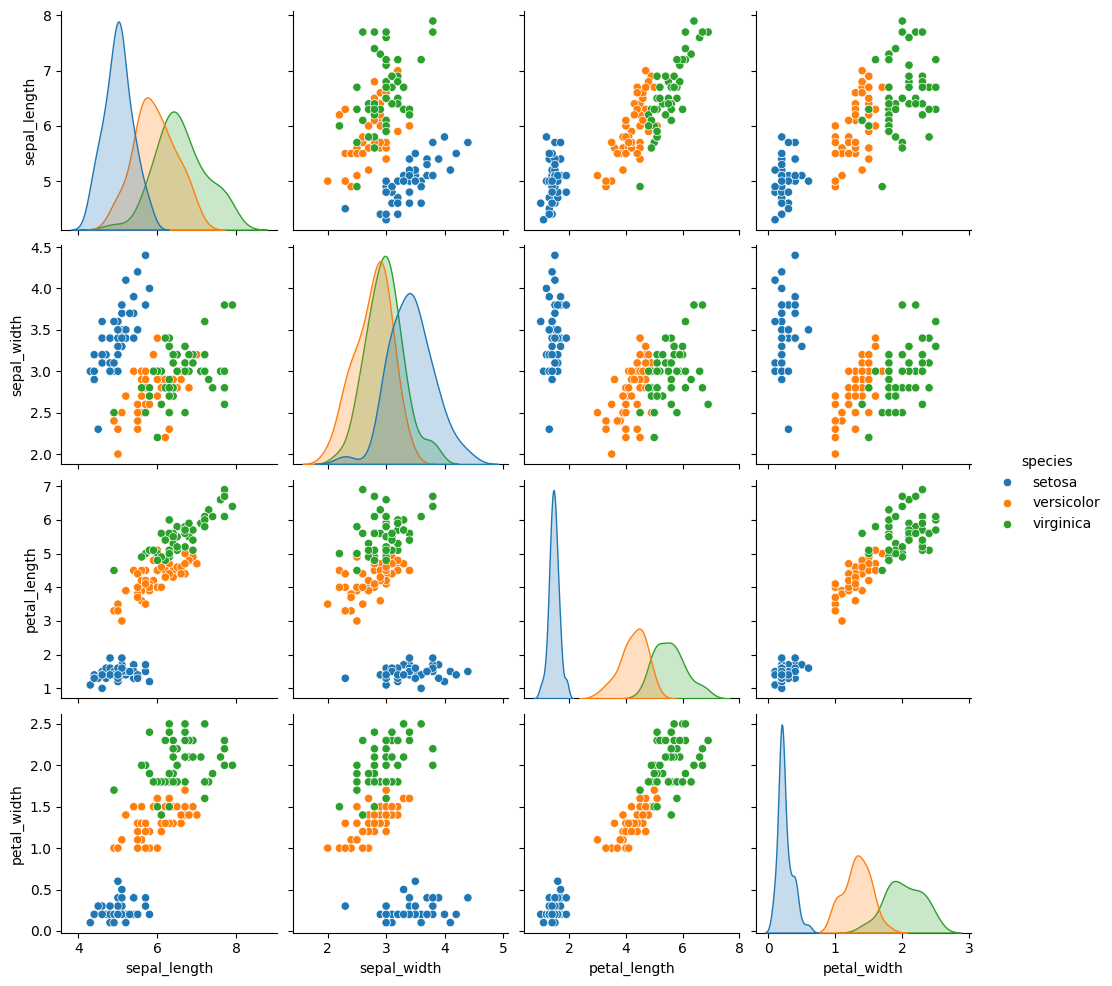

In [41]:
sns.pairplot(data=iris, hue='species')

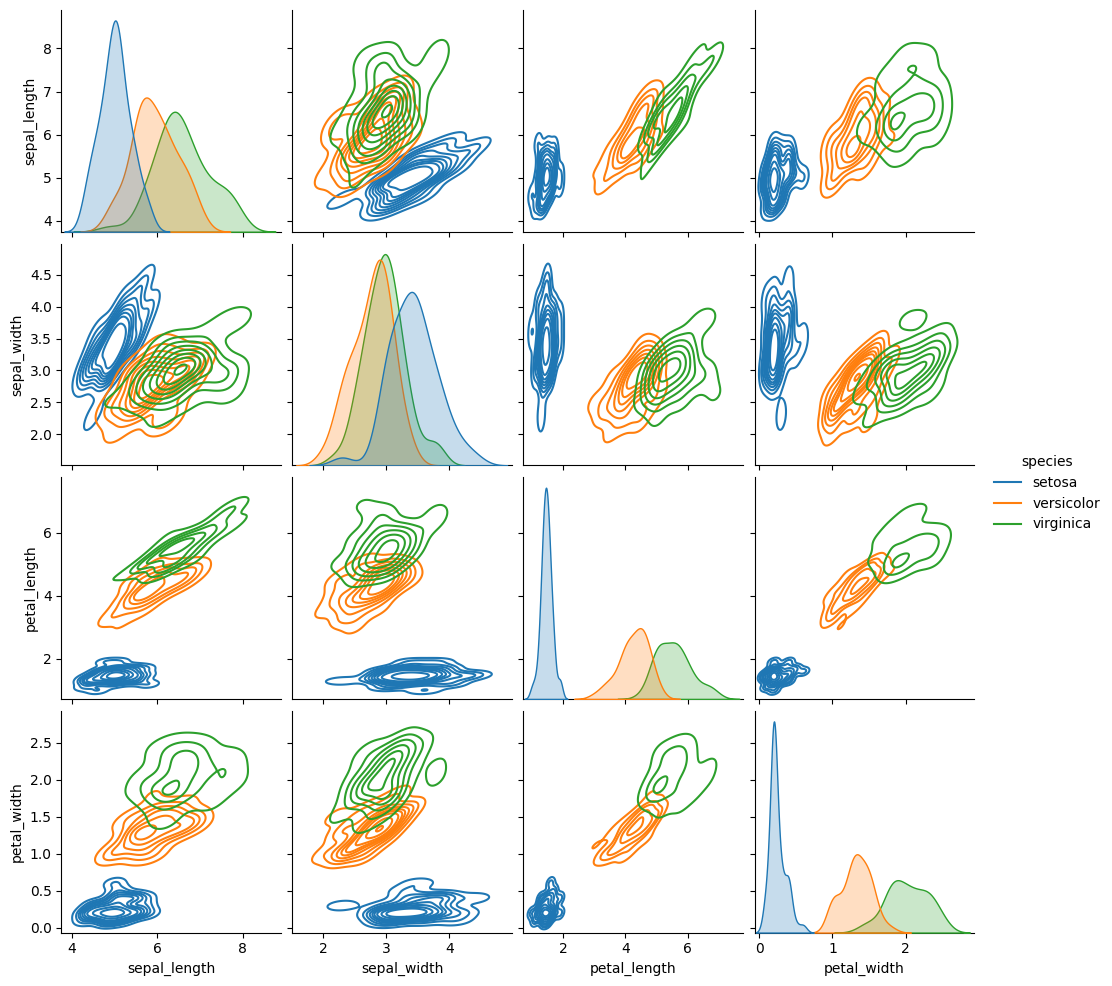

In [42]:
sns.pairplot(data=iris, hue='species', kind='kde')

---

## Aufgabe

* Lade das Cars Dataset `cars.csv`
* Führe zuerst notwendige Vorverarbeitungsschritte durch (sind (viele) Werte leer, unmöglich, Normalisieren, etc.) und Informieren Sie sich auch über das Dataset (zBsp. über https://www.kaggle.com/datasets/goyalshalini93/car-data)
* Geben Sie verschiedene Zentral und Streumaße an für Features, wo Sie es für notwendig halten
* Testen Sie die verschiedenen, bisher gelernten, Visualisierungsmöglichkeiten und Visualisieren Sie die Daten in einigen *sinnvollen* Grafiken
* Dokumentieren Sie alle Ergebnisse!

In [43]:
# Your code here